In [1]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
ESG_table = Table.read_table('ESGPorfolios_forcsv.csv')
ESG_sorted =  ESG_table.sort("Total_Var_Cost_USDperMWH")

In [3]:
ESG_sorted

Group,Group_num,UNIT NAME,Capacity_MW,Heat_Rate_MMBTUperMWh,Fuel_Price_USDperMMBTU,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Unnamed: 11,Unnamed: 12,Unnamed: 13
Old Timers,7,BIG CREEK,1000,nan,0,0,0,0,0,"$15,000",nan,nan,nan
Fossil Light,8,HELMS,800,nan,0,0,0.5,0.5,0,"$15,000",nan,nan,nan
Fossil Light,8,DIABLO CANYON 1,1000,1,7.5,7.5,4,11.5,0,"$20,000",nan,nan,nan
Bay Views,4,MOSS LANDING 6,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000",nan,nan,nan
Bay Views,4,MOSS LANDING 7,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000",nan,nan,nan
Old Timers,7,MOHAVE 1,750,10,3,30,4.5,34.5,0.94,"$15,000",nan,nan,nan
Old Timers,7,MOHAVE 2,750,10,3,30,4.5,34.5,0.94,"$15,000",nan,nan,nan
Big Coal,1,FOUR CORNERS,1900,11.67,3,35,1.5,36.5,1.1,"$8,000",nan,nan,nan
Bay Views,4,MORRO BAY 3&4,665,8.02,4.5,36.11,0.5,36.61,0.43,"$4,000",nan,nan,nan
East Bay,6,PITTSBURGH 5&6,650,8.02,4.5,36.11,0.5,36.61,0.43,"$2,500",nan,nan,nan


In [4]:
Big_Coal= ESG_sorted.where("Group","Big Coal")
Big_Coal
width = Big_Coal.column("Capacity_MW")
width
height = Big_Coal.column("Total_Var_Cost_USDperMWH")
height

array([ 36.5 ,  40.5 ,  41.94,  41.94,  66.5 ,  73.72])

In [5]:
"""
Given widths sorted in ascending order, returns the y_positions used to graph the capacity vs variable costs bar graph
"""

def find_y_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(width))
    half_widths = [i/2 for i in widths]
    y_pos = []
    for i in range(0, len(half_widths)):
        y_pos.append(half_widths[i] + cumulative_widths[i])
    return y_pos


In [6]:
new_y = find_y_pos(width)
new_y

[950.0, 2050.0, 2375.0, 3025.0, 3575.0, 3775.0]

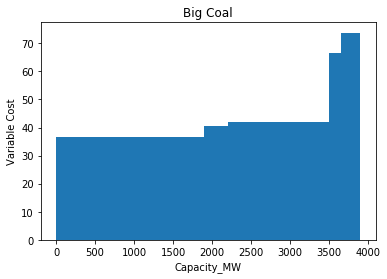

In [7]:
# Make the plot
plt.bar(new_y, height, width=width)
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Big Coal')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

In [8]:
width = ESG_sorted.column("Capacity_MW")
width
height = ESG_sorted.column("Total_Var_Cost_USDperMWH")
height

array([  0.  ,   0.5 ,  11.5 ,  32.56,  32.56,  34.5 ,  34.5 ,  36.5 ,
        36.61,  36.61,  38.06,  38.06,  38.78,  39.06,  39.5 ,  40.5 ,
        40.94,  41.22,  41.67,  41.94,  41.94,  42.39,  42.67,  43.83,
        44.83,  47.44,  49.17,  49.61,  52.06,  52.5 ,  53.94,  58.28,
        59.72,  61.17,  62.89,  65.5 ,  66.5 ,  69.83,  73.72,  75.61,
        75.89,  90.06])

In [9]:
new_y = find_y_pos(width)
new_y

[500.0,
 1400.0,
 2300.0,
 3175.0,
 3925.0,
 4675.0,
 5425.0,
 6750.0,
 8032.5,
 8690.0,
 9365.0,
 10065.0,
 10582.5,
 10900.0,
 11400.0,
 11900.0,
 12375.0,
 13025.0,
 13825.0,
 14475.0,
 15125.0,
 15925.0,
 16675.0,
 17450.0,
 18000.0,
 18275.0,
 18425.0,
 18575.0,
 18725.0,
 19075.0,
 19400.0,
 19525.0,
 19950.0,
 20375.0,
 20525.0,
 20675.0,
 20825.0,
 20975.0,
 21175.0,
 21450.0,
 21725.0,
 21950.0]

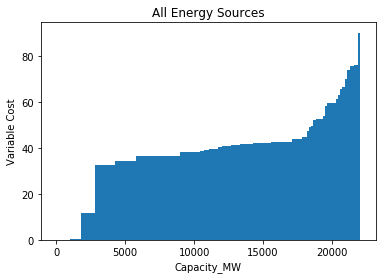

In [10]:
# Make the plot
plt.bar(new_y, height, width=width)
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

* Trying to figure out how to make a legend for this and perhaps better colors, but this segments the graph by energy source

In [11]:
energy_colors_dict = {}
count = 0
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in set(ESG_sorted['Group']):
    energy_colors_dict[i] = colors[count]
    count += 1

In [12]:
colors_mapped = list(pd.Series(ESG_sorted['Group']).map(energy_colors_dict))

In [13]:
ESG_sorted = ESG_sorted.with_column('Color', colors_mapped)

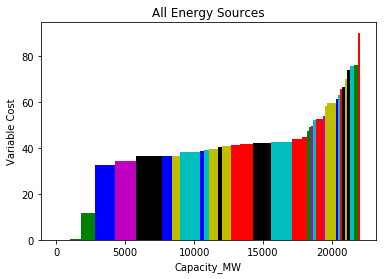

In [14]:
# Make the plot
plt.bar(new_y, height, width=width, color=ESG_sorted['Color'])
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

In [19]:
def price_line_calc(capacity, sorted_table):
    sum_cap = 0
    for i in range(0,len(sorted_table['Capacity_MW'])):
        if sum_cap + sorted_table['Capacity_MW'][i] > capacity:
            plt.axhline(y=sorted_table['Total_Var_Cost_USDperMWH'][i], color='r', linewidth = 2)
            plt.axvline(x=capacity, color='r', linewidth = 2)
            print("Price: " + str(sorted_table['Total_Var_Cost_USDperMWH'][i]))
            print("Capacity: " + str(capacity)
            break
        else:
            sum_cap += sorted_table['Capacity_MW'][i]

*With Lines for price and quantity

x


TypeError: Can't convert 'int' object to str implicitly

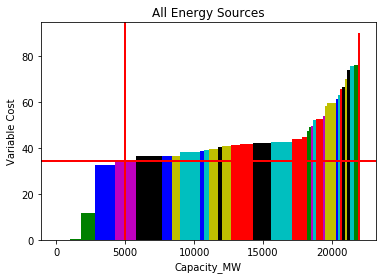

In [20]:
# Make the plot
plt.bar(new_y, height, width=width, color=ESG_sorted['Color'])
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')
price_line_calc(5000,ESG_sorted)

plt.show()